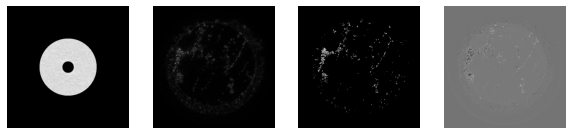

In [2]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt

def magnitude_phase_split(img):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = np.abs(dft_shift)

    phase_spectrum = np.angle(dft_shift)

    return magnitude_spectrum, phase_spectrum


def magnitude_phase_combine(img_m, img_p):
    img_mandp = img_m*np.e**(1j*img_p)

    img_mandp = np.uint8(np.abs(np.fft.ifft2(img_mandp)))
    img_mandp=img_mandp/np.max(img_mandp)*255 
    return img_mandp

def log_process(img_m):
    dftAmpLog = 20*np.log(np.abs(img_m))
    return dftAmpLog


image_path = '/home/allan/Downloads/Segmentation/tomo_49_jpeg/img/tomo_00049_rec_16bit00000038.png'
img = cv2.imread(image_path, 0)

img_m, img_p = magnitude_phase_split(img)

img_mlog = log_process(img_m)

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)  # center


mask = np.zeros((rows, cols), np.uint8)
r_out = 150
r_in = 30
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]

mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1

# apply mask and inverse DFT
img_mask = img_m * mask

img_mlog_mask = img_mlog*mask

img_rec = magnitude_phase_combine(img_mask, img_p)
ret, binary = cv2.threshold(img_rec, 50, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(10,12))
plt.subplot(141)
plt.xlabel("Magnitude")
plt.imshow(img_mlog_mask, cmap="gray") 
plt.axis('off')


plt.subplot(142) 
plt.imshow(img_rec, cmap="gray") 
plt.axis('off')
plt.xlabel("Reconstructed Image") 
plt.subplot(143) 
plt.imshow(binary, cmap="gray") 
plt.axis('off')
# plt.axis('off')
plt.xlabel("Binary Mask") 

plt.subplot(144)
plt.xlabel("Original Image")
plt.imshow(img, cmap="gray") 
plt.axis('off')
plt.show()